# Análise de Desempenho da Programação Paralela em Multiplicação de Matrizes em Python

## Introdução

As visualizações apresentadas exploram o impacto no desempenho de diferentes abordagens de multiplicação de matrizes em Python. Comparamos o desempenho com base no tempo transcorrido e no uso de memória para matrizes de tamanhos variáveis.

## Instalação e carregamento de dependências

In [1]:
!pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def groupby_data(df, groupby):
    grouped_data = df.groupby(groupby + ['flavor']).agg({
        'time-elapsed (s)': ['mean'],
        'max-memory-used (KB)': ['mean']
    }).reset_index()

    return grouped_data

In [4]:
def load_data(filename, groupby, flavor=''):
    df = pd.read_csv('usage.csv')

    grouped_data = groupby_data(df, groupby)

    grouped_data.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_data.columns.values]

    grouped_data = grouped_data[grouped_data['flavor'].str.contains(flavor)]

    return grouped_data

In [5]:
def plot_data(df, x, y1, y2):
    sns.set_style("whitegrid")
    plt.figure(figsize=(20, 10))

    plt.subplot(1, 2, 1)
    sns.barplot(data=df, x=x, hue='approach', y=y1)
    plt.title("Average Time Elapsed by Matrix Size and Approach")
    plt.ylabel("Average Time Elapsed (s)")
    plt.xlabel("Matrix A Size")
    plt.xticks(rotation=45)
    plt.legend(title="Approach")

    plt.subplot(1, 2, 2)
    sns.barplot(data=df, x=x, hue='approach', y=y2)
    plt.title("Average Memory Used by Matrix Size and Approach")
    plt.ylabel("Average Memory Used (KB)")
    plt.xlabel("Matrix A Size")
    plt.xticks(rotation=45)
    plt.legend(title="Approach")

    plt.tight_layout()
    plt.show()
    
    return df

## Figura 1: Tempo Médio Transcorrido por Tamanho de Matriz e Abordagem

Esse gráfico de barras ilustra o tempo médio necessário para a multiplicação de matrizes para diferentes tamanhos da matriz A, usando várias abordagens:

- **Sem threads**: Esta abordagem não utiliza nenhum paralelismo.
- **Numpy**: Utiliza a multiplicação de matrizes otimizada fornecida pela biblioteca Numpy.
- **Por item**: Utiliza paralelismo no nível do item.
- **Por linha**: Emprega paralelismo no nível da linha.

### Observações-Chave:

- Em todos os tamanhos de matrizes, a abordagem **Numpy** consistentemente se mostra a mais rápida, destacando a natureza otimizada das funções da biblioteca (van der Walt et al., 2011).
- Não usar threads resulta em um tempo de cálculo mais prolongado em comparação com outros métodos paralelizados.
- A abordagem **Por item**, embora utilize paralelismo, não foi tão eficiente quanto a Por linha em termos de tempo de execução. Este fato pode estar associado à concorrência gerada entre as threads. Quando muitas threads são criadas, elas competem por tempo de processador, o que pode levar a conflitos e, consequentemente, a uma menor eficiência do programa.
- Ambas as abordagens paralelas **Por item** e **Por linha** mostram tempos comparáveis, com ligeiras variações dependendo do tamanho da matriz.

## Figura 2: Memória Média Utilizada por Tamanho de Matriz e Abordagem (CPython)

Esse gráfico de barras retrata a memória média consumida durante a multiplicação de matrizes para diferentes tamanhos da matriz A entre as quatro abordagens.

### Observações-Chave:

- A abordagem paralela **Por item** consome significativamente mais memória do que os outros métodos, especialmente à medida que o tamanho da matriz aumenta. Este comportamento pode estar relacionado com a sobrecarga associada ao gerenciamento de cálculos paralelos a um nível tão granular.
- A abordagem **Numpy**, embora seja a mais rápida, também mantém uma pegada de memória moderada, tornando-a uma escolha eficiente tanto em velocidade quanto em memória.
- Não usar threads resulta em consumo moderado de memória, similar à abordagem **Por linha**.

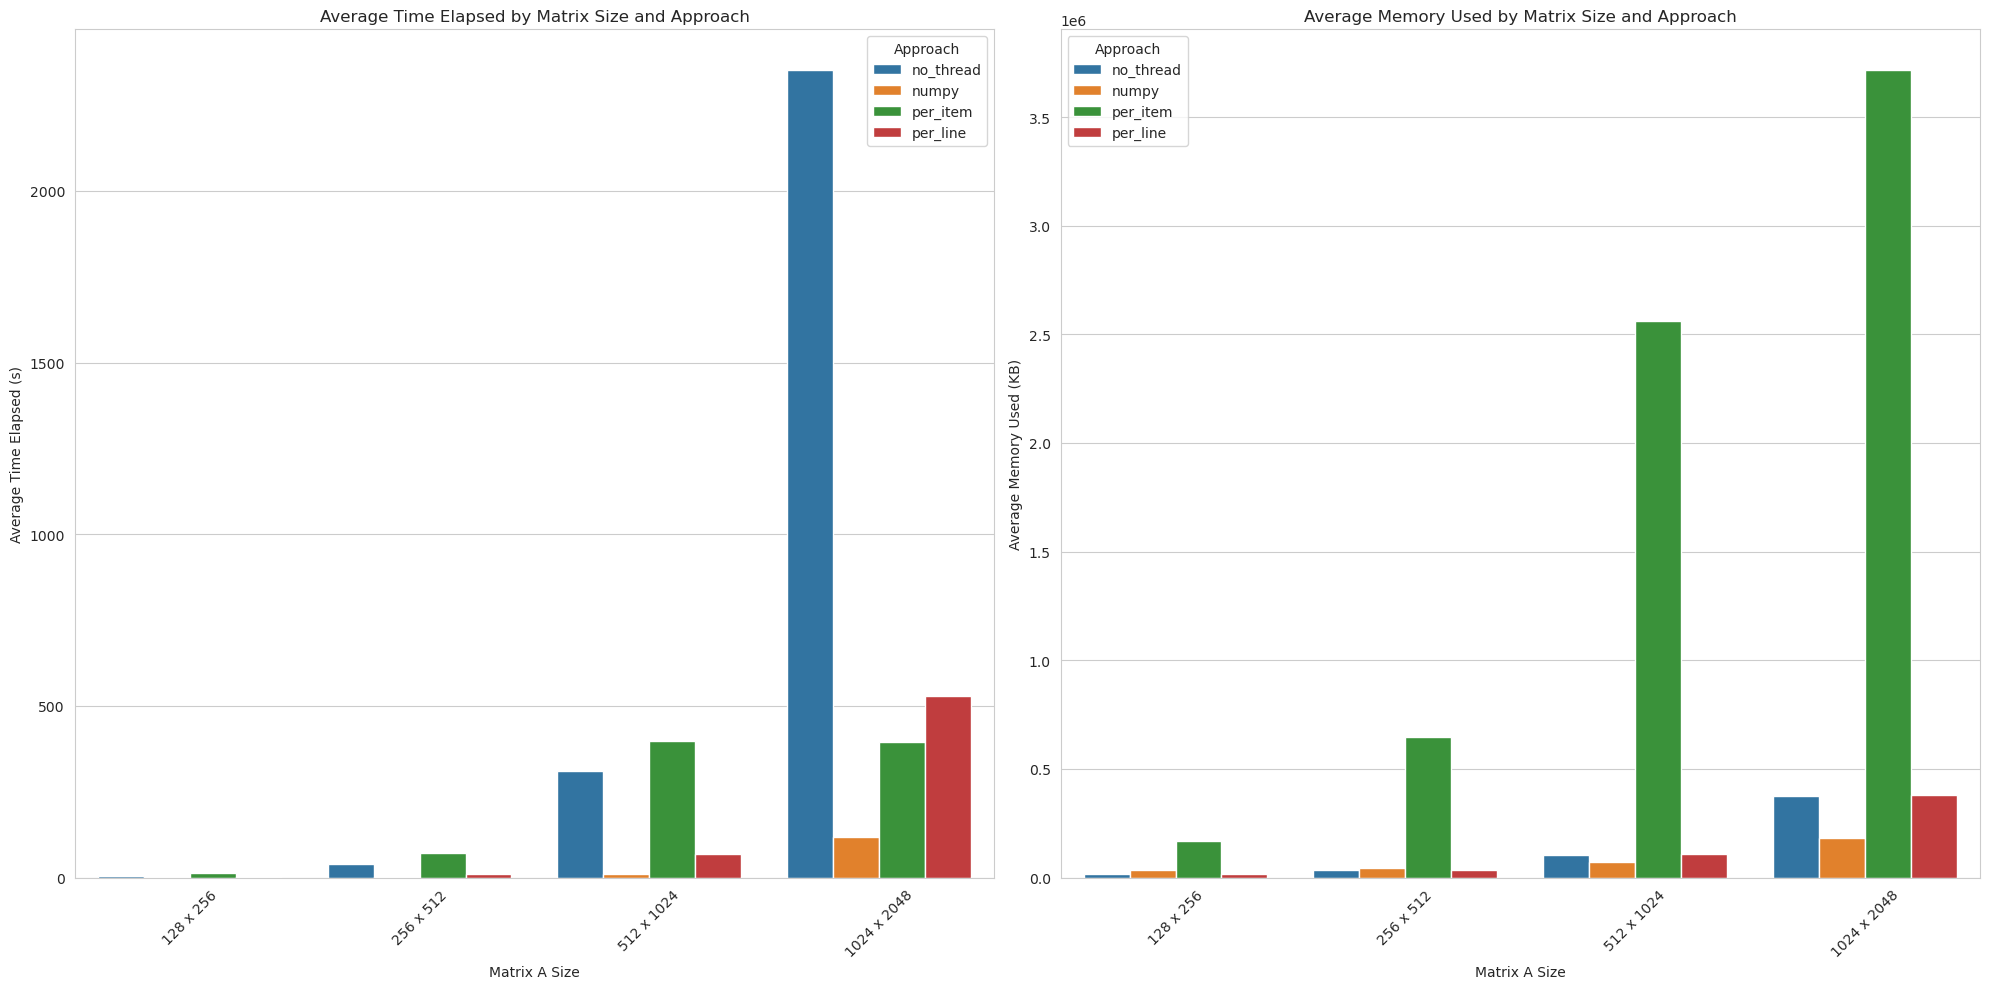

,mat_a_size,mat_b_size,approach,flavor,time-elapsed (s)_mean,max-memory-used (KB)_mean
8,128 x 256,256 x 512,no_thread,cpython,5.244,16614.4
10,128 x 256,256 x 512,numpy,cpython,0.714,35238.0
12,128 x 256,256 x 512,per_item,cpython,13.754,170487.6
14,128 x 256,256 x 512,per_line,cpython,2.099,17244.0
16,256 x 512,512 x 1024,no_thread,cpython,39.872,34188.8
18,256 x 512,512 x 1024,numpy,cpython,2.241,42490.4
20,256 x 512,512 x 1024,per_item,cpython,70.968,648884.8
22,256 x 512,512 x 1024,per_line,cpython,10.001,35202.0
24,512 x 1024,1024 x 2048,no_thread,cpython,309.743,104691.2
26,512 x 1024,1024 x 2048,numpy,cpython,11.328,71712.4


In [6]:
df = load_data(
    'usage.csv',
    ['mat_a_size', 'mat_b_size', 'approach'],
    'cpython'
).sort_values(
    by='mat_a_size',
    key=lambda x: x.apply(lambda y: int(y.split('x')[0]))
)

plot_data(df, 'mat_a_size', 'time-elapsed (s)_mean', 'max-memory-used (KB)_mean')

## Sobrecarga de Threads

É essencial notar que a paralelização, embora possa melhorar o desempenho, também pode resultar em sobrecarga do processador, principalmente quando um grande número de threads é utilizado simultaneamente sem uma estratégia adequada de gerenciamento ou controle. Este fenômeno é frequentemente referido como "overhead de thread", onde os custos associados ao início, término e alternância de threads superam os benefícios do paralelismo.

No contexto das implementações abordadas, a estratégia "Por item" é particularmente suscetível a este problema. Esta abordagem tenta alocar uma thread para o cálculo de cada item na matriz. Em sistemas com recursos limitados, isso pode resultar em uma situação em que o hardware não possui capacidade suficiente para gerenciar todas as threads simultaneamente. A consequência disso pode ser um atraso significativo, falhas ou até mesmo a incapacidade de concluir a operação.

Na prática, é crucial empregar estratégias que limitem o número de threads em execução simultânea ou que façam um uso mais inteligente do paralelismo, adaptando-se dinamicamente às capacidades do sistema.

## Comparação entre resultados do Pypy e CPython

1. **Tempo de Execução**: Para matrizes menores, Pypy e CPython apresentam tempos de execução similares. Contudo, à medida que o tamanho da matriz aumenta, o Pypy demonstra uma vantagem significativa. Esse comportamento pode ser atribuído ao compilador JIT (Just-In-Time) do Pypy. Ao contrário do interpretador tradicional do CPython, que analisa o bytecode linha por linha, o JIT do Pypy compila "hot loops" (partes do código que são executadas repetidamente) diretamente para código de máquina. Isso elimina a sobrecarga da interpretação e resulta em execução mais rápida.

2. **Uso de Memória**: O aumento do consumo de memória no Pypy em comparação com o CPython pode ser atribuído a vários fatores. Primeiramente, a compilação JIT requer memória adicional para armazenar o código de máquina gerado. Além disso, o Pypy utiliza uma coleta de lixo diferente (Garbage Collection), conhecida como "GC incremental", que, embora mais eficiente em muitos casos, pode consumir mais memória.

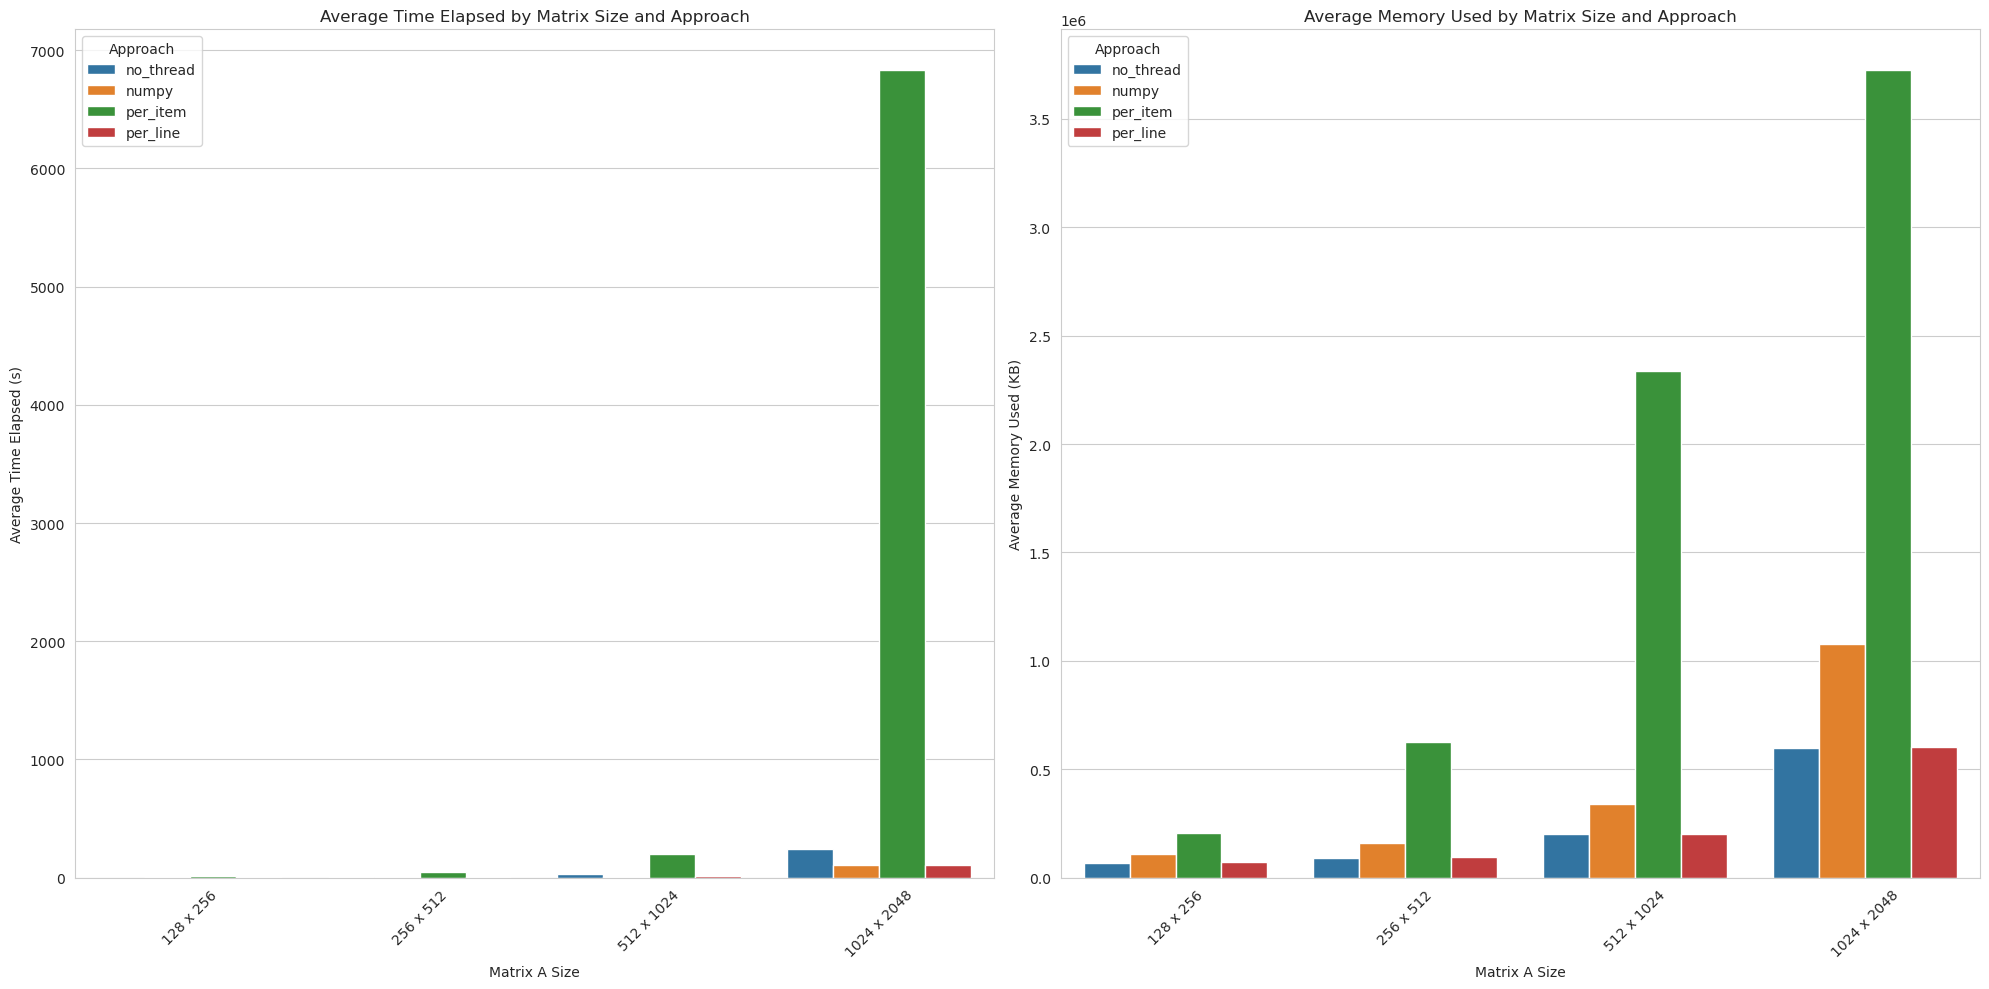

,mat_a_size,mat_b_size,approach,flavor,time-elapsed (s)_mean,max-memory-used (KB)_mean
9,128 x 256,256 x 512,no_thread,pypy,0.698,69312.0
11,128 x 256,256 x 512,numpy,pypy,0.986,106887.6
13,128 x 256,256 x 512,per_item,pypy,12.775,207130.4
15,128 x 256,256 x 512,per_line,pypy,3.223,70387.2
17,256 x 512,512 x 1024,no_thread,pypy,4.251,91584.0
19,256 x 512,512 x 1024,numpy,pypy,1.574,157816.8
21,256 x 512,512 x 1024,per_item,pypy,50.104,625240.4
23,256 x 512,512 x 1024,per_line,pypy,2.171,93683.2
25,512 x 1024,1024 x 2048,no_thread,pypy,31.705,198860.8
27,512 x 1024,1024 x 2048,numpy,pypy,7.501,341496.4


In [7]:
df = load_data(
    'usage.csv',
    ['mat_a_size', 'mat_b_size', 'approach'],
    'pypy'
).sort_values(
    by='mat_a_size',
    key=lambda x: x.apply(lambda y: int(y.split('x')[0]))
)

plot_data(df, 'mat_a_size', 'time-elapsed (s)_mean', 'max-memory-used (KB)_mean')

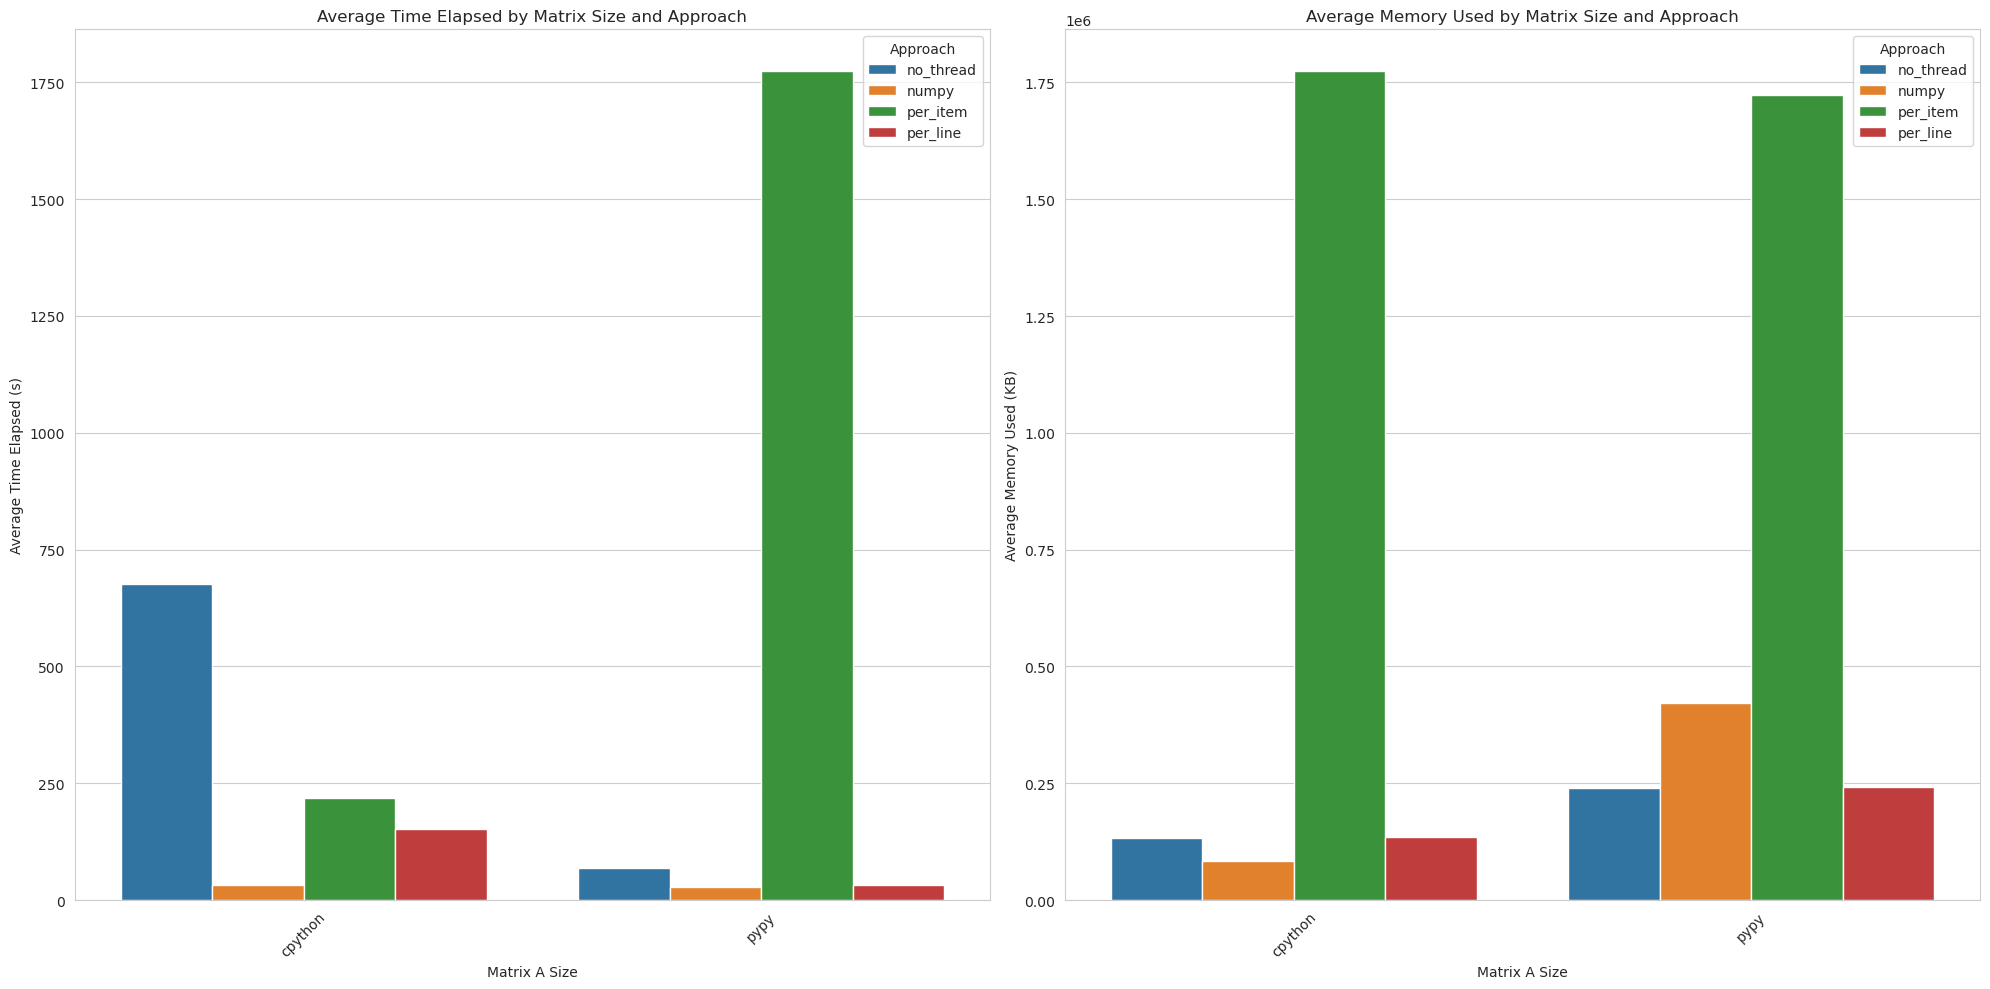

,approach,flavor,time-elapsed (s)_mean,max-memory-used (KB)_mean
0,no_thread,cpython,676.93675,132732.8
1,no_thread,pypy,69.54825,239142.4
2,numpy,cpython,33.16850,82635.4
3,numpy,pypy,28.25775,420960.6
4,per_item,cpython,219.32950,1774937.8
5,per_item,pypy,1774.69525,1724143.4
6,per_line,cpython,152.12275,134431.6
7,per_line,pypy,32.21425,241158.4


In [8]:
df = load_data(
    'usage.csv',
    ['approach']
)

plot_data(df, 'flavor', 'time-elapsed (s)_mean', 'max-memory-used (KB)_mean')

## Conclusão

Nesta análise, buscamos experimentar as diferenças de desempenho entre diferentes implementações do uso de _threads_ na linguagem Python utilizando diferentes _runtimes_ para sua execução. Ao observar os resultados, é crucial ressaltar que as conclusões derivadas são limitadas ao escopo específico de multiplicação de matrizes. Este é um cenário particular e, como tal, não necessariamente reflete o comportamento desses interpretadores em outras situações ou aplicações.

Além disso, é importante reconhecer que nossos testes não são exaustivos. Existem várias variáveis, tanto inerentes à natureza dos dados quanto à configuração dos sistemas, que podem influenciar o desempenho e que não foram exploradas nesta análise.

Olhando para o futuro, alguns passos são essenciais para uma compreensão mais profunda:

1. Testar Outros Runtimes do Python: Explorar outras implementações, como Jython ou IronPython, pode oferecer insights adicionais sobre o desempenho e as características de cada runtime.
2. Compilações vs. Interpretações: Investigar o impacto de compilar o código Python em vez de interpretá-lo diretamente, usando ferramentas como Cython ou Nuitka.
3. Análise de Threads: Uma das questões mais pertinentes em programação concorrente é decidir quando e como usar threads. Em cenários futuros, será crucial examinar em que situações o uso de threads é benéfico e quando pode ser contraproducente.